# Import necessary libraries

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Load Dataset

In [65]:
df = pd.read_csv('data_car.csv')

In [66]:
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [67]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

# EDA

### Number of cars based on Make

In [68]:
make=df["Make"].value_counts()

In [69]:
make

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

### Price by no of cylinders

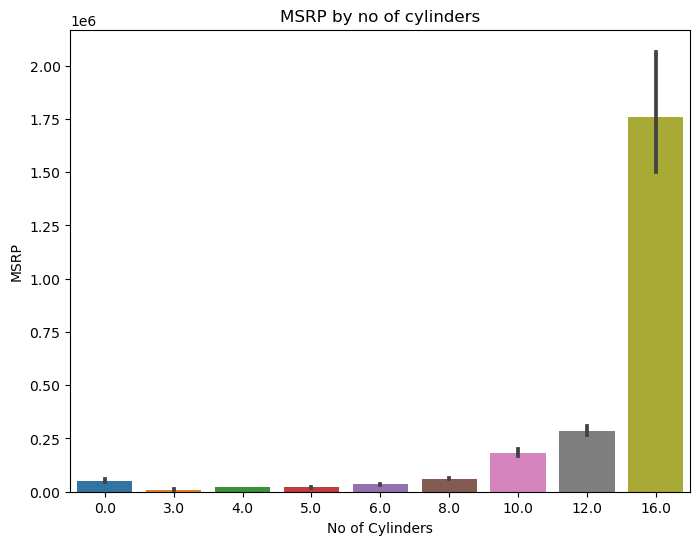

In [70]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Engine Cylinders', y='MSRP', data=df, ax=ax)
ax.set_title('MSRP by no of cylinders')
ax.set_xlabel('No of Cylinders')
ax.set_ylabel('MSRP')
plt.show()

### Price by year of manufacture

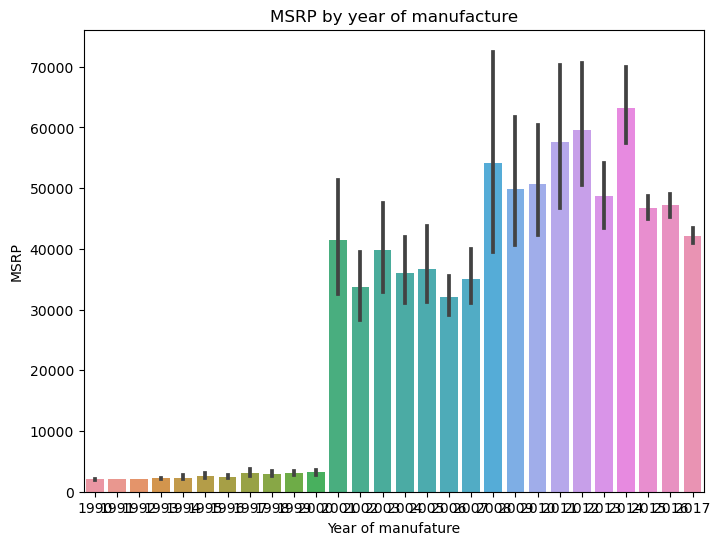

In [71]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Year', y='MSRP', data=df, ax=ax)
ax.set_title('MSRP by year of manufacture')
ax.set_xlabel('Year of manufature')
ax.set_ylabel('MSRP')
plt.show()

### Average price based on Make

In [72]:
avg_by_make=df.groupby('Make')['MSRP'].mean()

In [73]:
avg_by_make

Make
Acura            3.488759e+04
Alfa Romeo       6.160000e+04
Aston Martin     1.979104e+05
Audi             5.345211e+04
BMW              6.154676e+04
Bentley          2.471693e+05
Bugatti          1.757224e+06
Buick            2.820661e+04
Cadillac         5.623132e+04
Chevrolet        2.835039e+04
Chrysler         2.672296e+04
Dodge            2.239006e+04
FIAT             2.267024e+04
Ferrari          2.382188e+05
Ford             2.739927e+04
GMC              3.049330e+04
Genesis          4.661667e+04
HUMMER           3.646441e+04
Honda            2.667434e+04
Hyundai          2.459704e+04
Infiniti         4.239421e+04
Kia              2.531017e+04
Lamborghini      3.315673e+05
Land Rover       6.782322e+04
Lexus            4.754907e+04
Lincoln          4.283983e+04
Lotus            6.918828e+04
Maserati         1.142077e+05
Maybach          5.462219e+05
Mazda            2.003938e+04
McLaren          2.398050e+05
Mercedes-Benz    7.147623e+04
Mitsubishi       2.124054e+04
Nissa

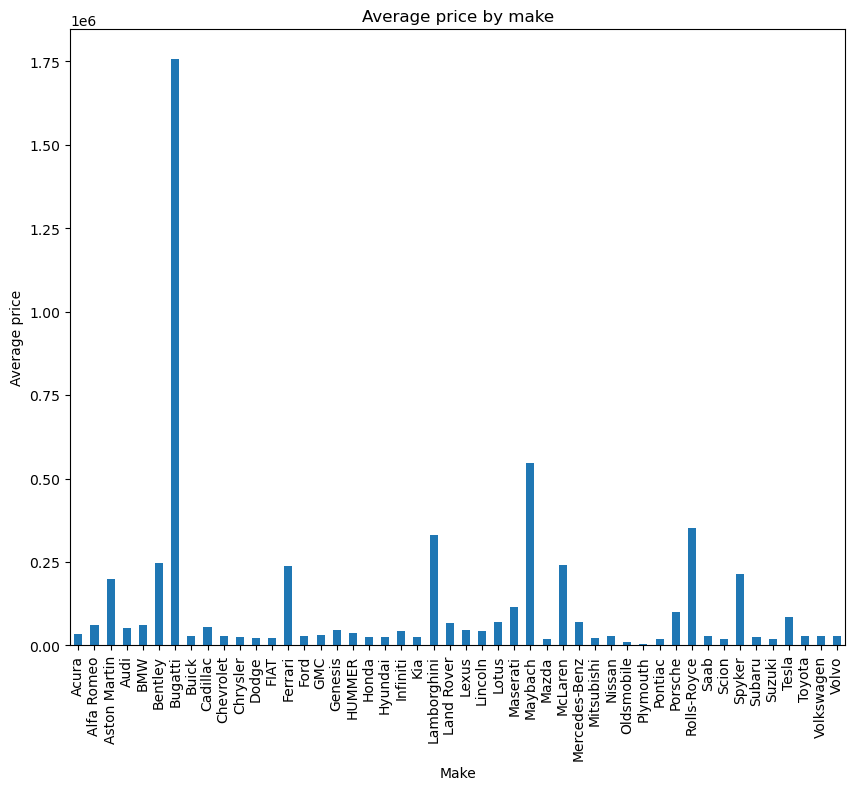

In [74]:
plt.figure(figsize=(10,8))
avg_by_make.plot(kind='bar')
plt.xlabel('Make')
plt.ylabel('Average price')
plt.title('Average price by make')
plt.show()

# Preprocessing

# Checking for null values

In [75]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# Droping Market category column due to high number of missing values and less impact 

In [76]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [77]:
df = df.drop('Market Category', axis=1)

# Encode the categorical columns

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le = LabelEncoder()
df['Make'] = le.fit_transform(df['Make'])
df['Model'] = le.fit_transform(df['Model'])
df['Engine Fuel Type'] = le.fit_transform(df['Engine Fuel Type'])
df['Transmission Type'] = le.fit_transform(df['Transmission Type'])
df['Driven_Wheels'] = le.fit_transform(df['Driven_Wheels'])
df['Vehicle Size'] = le.fit_transform(df['Vehicle Size'])
df['Vehicle Style'] = le.fit_transform(df['Vehicle Style'])

In [80]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,2011,8,335.0,6.0,3,3,2.0,0,8,26,19,3916,46135
1,4,0,2011,8,300.0,6.0,3,3,2.0,0,6,28,19,3916,40650
2,4,0,2011,8,300.0,6.0,3,3,2.0,0,8,28,20,3916,36350
3,4,0,2011,8,230.0,6.0,3,3,2.0,0,8,28,18,3916,29450
4,4,0,2011,8,230.0,6.0,3,3,2.0,0,6,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,901,2012,8,300.0,6.0,1,0,4.0,2,2,23,16,204,46120
11910,0,901,2012,8,300.0,6.0,1,0,4.0,2,2,23,16,204,56670
11911,0,901,2012,8,300.0,6.0,1,0,4.0,2,2,23,16,204,50620
11912,0,901,2013,7,300.0,6.0,1,0,4.0,2,2,23,16,204,50920


In [81]:
corr = df.corr()

In [82]:
corr.style.applymap(lambda x: "background-color: red" if x > 0.05 else "background-color: orange" if x < -0.05 else "background-color: blue")

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
Make,1.000000,0.037819,-0.013936,0.116000,-0.226702,-0.264326,0.045022,-0.035689,0.057025,-0.102262,-0.057137,0.133242,0.150862,-0.297651,-0.107331
Model,0.037819,1.000000,0.030913,-0.009923,0.001881,0.068406,-0.074973,-0.071920,0.138614,0.020197,-0.091614,-0.104276,-0.035716,-0.073725,-0.029843
Year,-0.013936,0.030913,1.000000,-0.254002,0.351794,-0.041479,-0.361553,-0.183914,0.263787,0.102098,-0.067713,0.258240,0.198171,0.073049,0.227590
Engine Fuel Type,0.116000,-0.009923,-0.254002,1.000000,-0.204224,-0.076528,0.123393,0.019074,-0.003671,-0.048840,-0.044001,-0.171581,-0.184774,-0.059557,-0.114816
Engine HP,-0.226702,0.001881,0.351794,-0.204224,1.000000,0.779988,-0.238360,-0.035227,-0.102713,0.208144,0.013753,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.264326,0.068406,-0.041479,-0.076528,0.779988,1.000000,-0.165207,0.087204,-0.140088,0.195892,0.032998,-0.621606,-0.600776,0.041145,0.531312
Transmission Type,0.045022,-0.074973,-0.361553,0.123393,-0.238360,-0.165207,1.000000,0.173338,-0.335601,-0.305262,-0.035039,0.044252,0.048807,0.010095,-0.181742
Driven_Wheels,-0.035689,-0.071920,-0.183914,0.019074,-0.035227,0.087204,0.173338,1.000000,-0.253786,-0.132160,0.099985,-0.003503,-0.011236,0.026987,-0.037943
Number of Doors,0.057025,0.138614,0.263787,-0.003671,-0.102713,-0.140088,-0.335601,-0.253786,1.000000,0.267091,0.202613,0.118570,0.120881,-0.048272,-0.126635
Vehicle Size,-0.102262,0.020197,0.102098,-0.048840,0.208144,0.195892,-0.305262,-0.132160,0.267091,1.000000,0.166140,-0.111000,-0.142728,-0.003995,0.037162


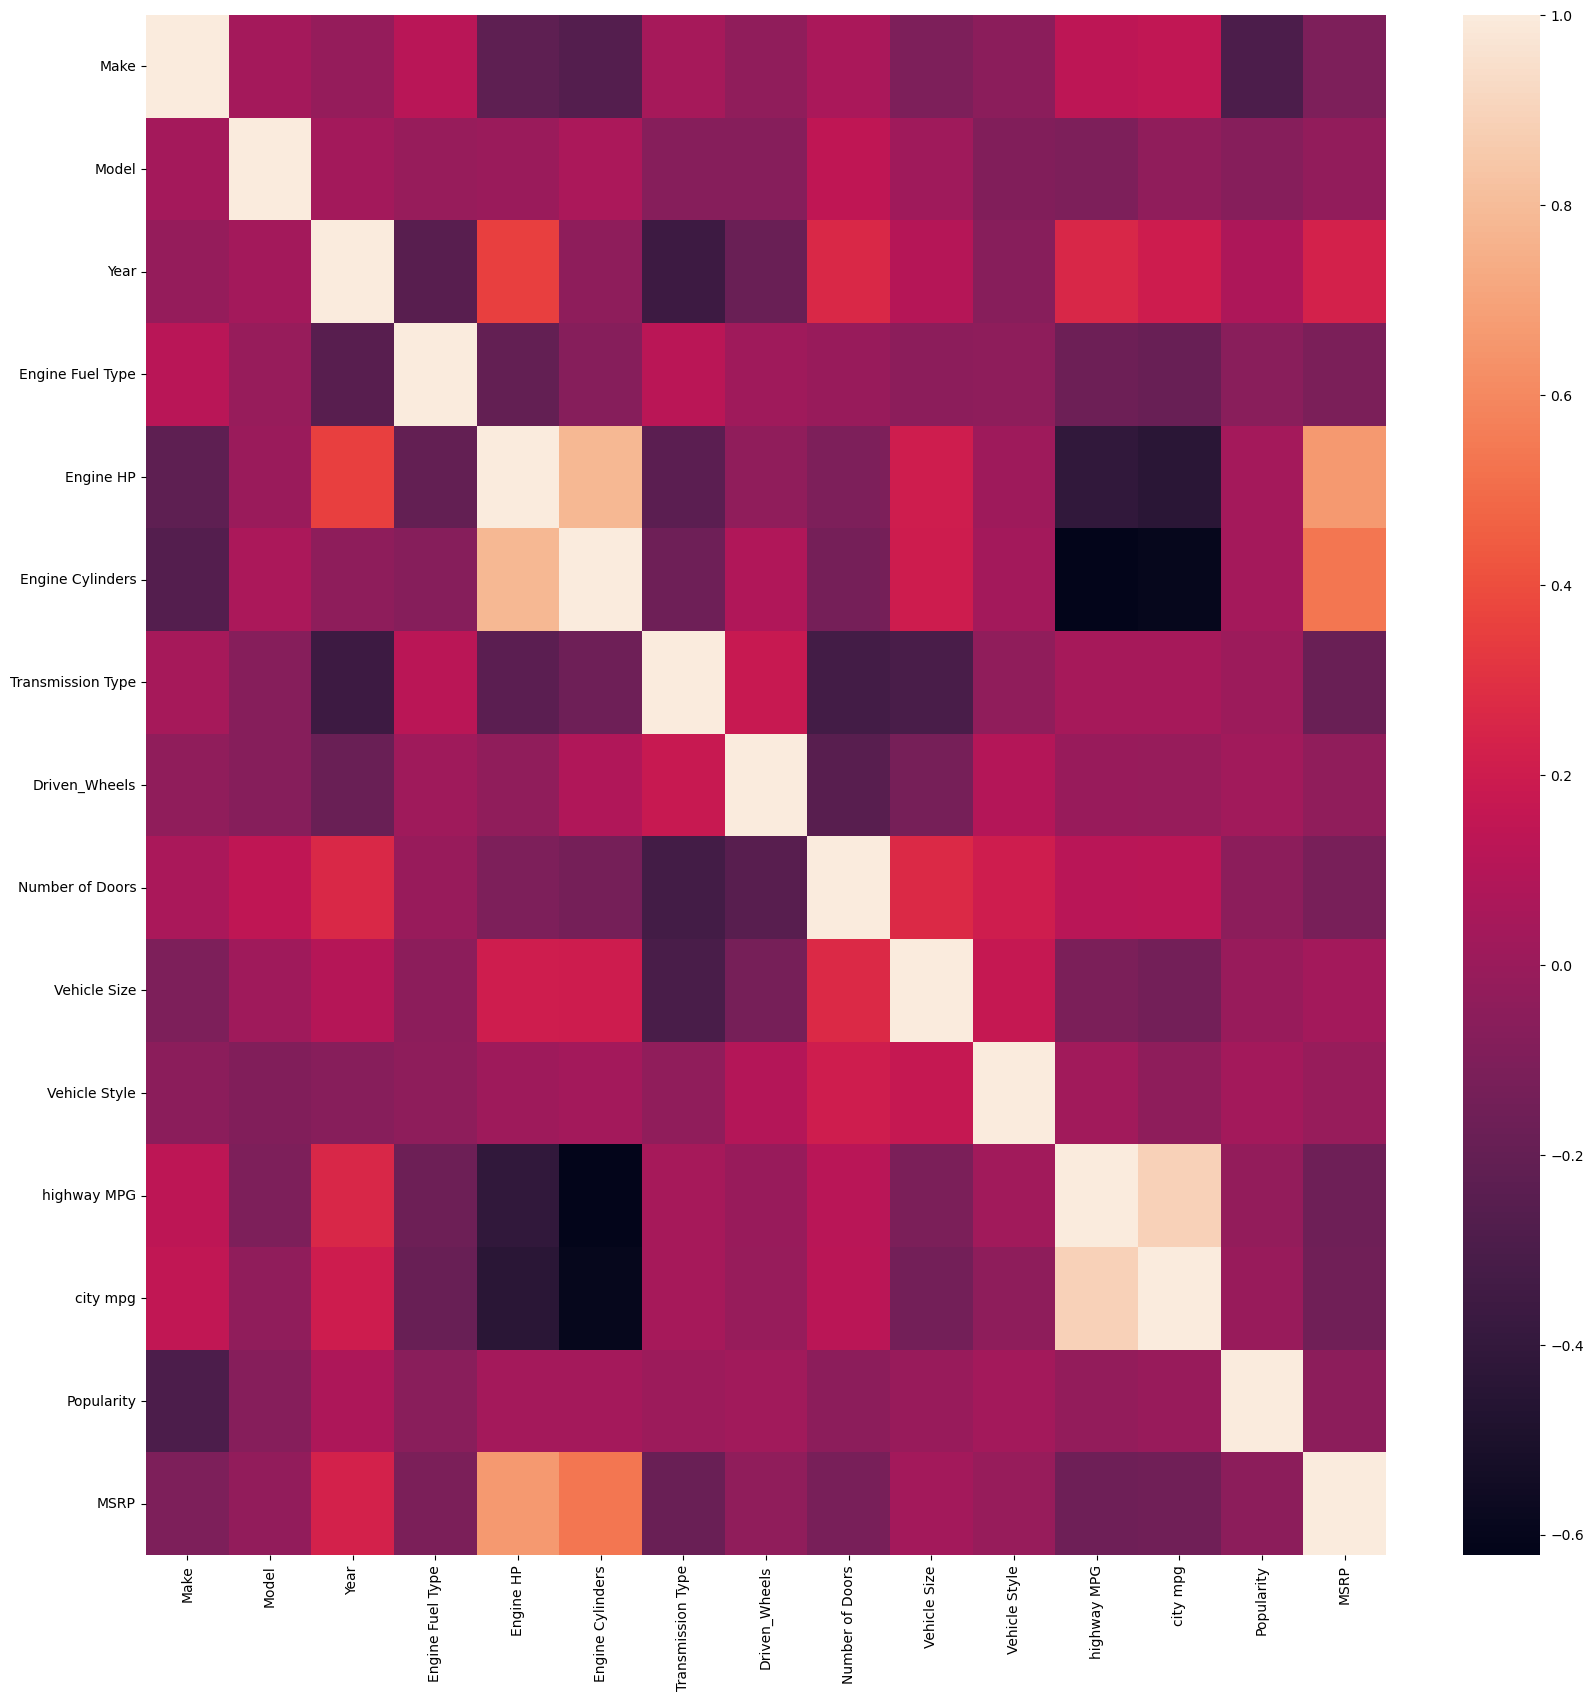

In [83]:
fig = plt.subplots(figsize=(20, 20)) 
sns.heatmap(corr)
plt.show()

# From correlation graph we can only consider fields having correlation atleast above 0.05 and below -0.05 for the model.

In [84]:
data = df[['Make','Year','Engine Fuel Type','Engine HP','Engine Cylinders','Transmission Type','Number of Doors','highway MPG','city mpg','MSRP']].copy()

In [85]:
data

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Number of Doors,highway MPG,city mpg,MSRP
0,4,2011,8,335.0,6.0,3,2.0,26,19,46135
1,4,2011,8,300.0,6.0,3,2.0,28,19,40650
2,4,2011,8,300.0,6.0,3,2.0,28,20,36350
3,4,2011,8,230.0,6.0,3,2.0,28,18,29450
4,4,2011,8,230.0,6.0,3,2.0,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,0,2012,8,300.0,6.0,1,4.0,23,16,46120
11910,0,2012,8,300.0,6.0,1,4.0,23,16,56670
11911,0,2012,8,300.0,6.0,1,4.0,23,16,50620
11912,0,2013,7,300.0,6.0,1,4.0,23,16,50920


# Handling the missing values 

In [86]:
data.isnull().sum()

Make                  0
Year                  0
Engine Fuel Type      0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Number of Doors       6
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

In [87]:
engine_cylinders = data['Engine Cylinders'].median()
engine_hp_median = data['Engine HP'].median()
doors_median = data['Number of Doors'].median()
data['Engine Cylinders'].fillna(engine_cylinders, inplace=True) 
data['Engine HP'].fillna(engine_hp_median, inplace=True) 
data['Number of Doors'].fillna(doors_median, inplace=True)

In [88]:
data.isnull().sum()

Make                 0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Number of Doors      0
highway MPG          0
city mpg             0
MSRP                 0
dtype: int64

# MSRP is the target column here

## splitting inti train and test data

In [89]:
size = int(len(data)*0.7)
train = data[:size]
test = data[size:]

In [90]:
X_train = train[['Make','Year','Engine Fuel Type','Engine HP','Engine Cylinders','Transmission Type','Number of Doors','highway MPG','city mpg']]
y_train = train['MSRP']

X_test = test[['Make','Year','Engine Fuel Type','Engine HP','Engine Cylinders','Transmission Type','Number of Doors','highway MPG','city mpg']]
y_test = test['MSRP']

## Scaling the input

In [91]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

# Linera regression model

In [92]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)

In [93]:
r2_lr=r2_score(y_test, y_pred)

In [94]:
r2_lr

0.31990988897019557

# Random forest

In [98]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [99]:
r2_rf=r2_score(y_test, y_pred)

In [100]:
r2_rf

0.46959102712283574

# Gradient Booster

In [104]:
gbt = GradientBoostingRegressor()
gbt.fit(X_train,y_train)
y_pred = gbt.predict(X_test)

In [105]:
r2_gbt = r2_score(y_test,y_pred)

In [106]:
r2_gbt

0.4485825219831423

# From the above models Random forest is the best suited for the prediction